In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('data.csv')


pd.get_dummies(data[['磁芯材料','励磁波形']])

Y = data['磁芯损耗，w/m3'].copy()

data.columns




plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

subset = data.iloc[:, 5:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)
# 输出结果
data['磁通密度峰值']
# 实验一数据
X=pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model=RandomForestRegressor()
model.fit(X_train, Y_train)

# 预测
Y_pred = model.predict(X_test)

# 计算评估指标
r2 = r2_score(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# 输出评估指标
print(f'R²: {r2:.4f}')
print(f'MAPE: {mape:.4f}')

R²: 0.9859
MAPE: 11.6843


In [2]:
#实验二
# 实验三
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,classification_report

warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('data_.csv')

# aa=data[data.columns[6:]]
# pca = PCA(n_components=3)
# pca.fit(aa)
# sum(pca.explained_variance_ratio_)
# newX=pca.fit_transform(aa)

# data.insert(5, 'X1', newX[:,0])
# data.insert(6, 'X2', newX[:,1])
# data.insert(7, 'X3', newX[:,2])

pd.get_dummies(data[['磁芯材料','励磁波形']])

Y = data['磁芯损耗，w/m3'].copy()

data.columns




plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

subset = data.iloc[:, 24:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)
# 输出结果
data['磁通密度峰值']
# '均值','标准差','方差','最大值','最小值','峰峰值','均方根','波形因子','峰度','偏度','频谱能量','频谱质心','频谱带宽','主频率','频谱熵','频谱平坦度',
X=pd.concat([pd.get_dummies(data[['均值','标准差','方差','最大值','最小值','峰峰值','均方根','波形因子','峰度','偏度','频谱能量','频谱质心','频谱带宽','主频率','频谱熵','频谱平坦度','磁芯材料', '温度，oC','励磁波形']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)
X = pd.concat([X,Y],axis=1)
train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size=0.1, random_state=42)
predictor = TabularPredictor(label='磁芯损耗，w/m3', eval_metric="mape").fit(train_data=train_x)
predictor.leaderboard(test_x, silent=True, extra_metrics=["r2", "mape"])



No path specified. Models will be saved in: "AutogluonModels\ag-20240925_015241"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          24
Memory Avail:       13.42 GB / 31.16 GB (43.1%)
Disk Space Avail:   253.00 GB / 1650.76 GB (15.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial p

[1000]	valid_set's l2: 6.08379e+08	valid_set's mean_absolute_percentage_error: -0.178375
[2000]	valid_set's l2: 4.53536e+08	valid_set's mean_absolute_percentage_error: -0.148002
[3000]	valid_set's l2: 4.03809e+08	valid_set's mean_absolute_percentage_error: -0.137228
[4000]	valid_set's l2: 3.79358e+08	valid_set's mean_absolute_percentage_error: -0.130601
[5000]	valid_set's l2: 3.64817e+08	valid_set's mean_absolute_percentage_error: -0.126634
[6000]	valid_set's l2: 3.57525e+08	valid_set's mean_absolute_percentage_error: -0.123545
[7000]	valid_set's l2: 3.51429e+08	valid_set's mean_absolute_percentage_error: -0.12092
[8000]	valid_set's l2: 3.47411e+08	valid_set's mean_absolute_percentage_error: -0.118887
[9000]	valid_set's l2: 3.44172e+08	valid_set's mean_absolute_percentage_error: -0.118111
[10000]	valid_set's l2: 3.41954e+08	valid_set's mean_absolute_percentage_error: -0.117007


	-0.117	 = Validation score   (-mean_absolute_percentage_error)
	11.95s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l2: 5.28899e+08	valid_set's mean_absolute_percentage_error: -0.142483
[2000]	valid_set's l2: 4.91281e+08	valid_set's mean_absolute_percentage_error: -0.115012
[3000]	valid_set's l2: 4.79784e+08	valid_set's mean_absolute_percentage_error: -0.105077
[4000]	valid_set's l2: 4.75909e+08	valid_set's mean_absolute_percentage_error: -0.0982461
[5000]	valid_set's l2: 4.73722e+08	valid_set's mean_absolute_percentage_error: -0.0970306
[6000]	valid_set's l2: 4.73027e+08	valid_set's mean_absolute_percentage_error: -0.0957096
[7000]	valid_set's l2: 4.72574e+08	valid_set's mean_absolute_percentage_error: -0.094397
[8000]	valid_set's l2: 4.7249e+08	valid_set's mean_absolute_percentage_error: -0.0936077
[9000]	valid_set's l2: 4.72318e+08	valid_set's mean_absolute_percentage_error: -0.093172
[10000]	valid_set's l2: 4.72259e+08	valid_set's mean_absolute_percentage_error: -0.0927224


	-0.0927	 = Validation score   (-mean_absolute_percentage_error)
	12.62s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.1066	 = Validation score   (-mean_absolute_percentage_error)
	2.04s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1063	 = Validation score   (-mean_absolute_percentage_error)
	48.99s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0833	 = Validation score   (-mean_absolute_percentage_error)
	0.55s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Metric mean_absolute_percentage_error is not supported by this model - using mean_squared_error instead
	-0.234	 = Validation score   (-mean_absolute_percentage_error)
	4.98s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-0.1063	 = Validation score   (-mean_absolute_percentage_error)
	15.87s	 = Training   runtime
	0.03s	 = Validation runtime

[1000]	valid_set's l2: 1.02793e+09	valid_set's mean_absolute_percentage_error: -0.0687975
[2000]	valid_set's l2: 1.02376e+09	valid_set's mean_absolute_percentage_error: -0.0595294
[3000]	valid_set's l2: 1.02341e+09	valid_set's mean_absolute_percentage_error: -0.0585065
[4000]	valid_set's l2: 1.02334e+09	valid_set's mean_absolute_percentage_error: -0.0582334
[5000]	valid_set's l2: 1.0233e+09	valid_set's mean_absolute_percentage_error: -0.0581594
[6000]	valid_set's l2: 1.0233e+09	valid_set's mean_absolute_percentage_error: -0.0581306
[7000]	valid_set's l2: 1.0233e+09	valid_set's mean_absolute_percentage_error: -0.058122
[8000]	valid_set's l2: 1.0233e+09	valid_set's mean_absolute_percentage_error: -0.0581198
[9000]	valid_set's l2: 1.0233e+09	valid_set's mean_absolute_percentage_error: -0.0581185
[10000]	valid_set's l2: 1.0233e+09	valid_set's mean_absolute_percentage_error: -0.0581184


	-0.0581	 = Validation score   (-mean_absolute_percentage_error)
	25.21s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.4, 'ExtraTreesMSE': 0.16, 'CatBoost': 0.12, 'NeuralNetTorch': 0.12, 'LightGBM': 0.08, 'LightGBMXT': 0.04, 'NeuralNetFastAI': 0.04, 'XGBoost': 0.04}
	-0.0445	 = Validation score   (-mean_absolute_percentage_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 147.18s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 4010.6 rows/s (1116 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240925_015241")


,model,score_test,r2,mean_absolute_percentage_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.045794,0.996603,-0.045794,-0.044497,mean_absolute_percentage_error,1.456999,0.278261,139.557914,0.026000,0.000000,0.039999,2,True,12
1,LightGBMLarge,-0.061223,0.993758,-0.061223,-0.058118,mean_absolute_percentage_error,0.461999,0.116000,25.212144,0.461999,0.116000,25.212144,1,True,11
2,ExtraTreesMSE,-0.078643,0.989990,-0.078643,-0.083346,mean_absolute_percentage_error,0.242999,0.046000,0.547000,0.242999,0.046000,0.547000,1,True,7
3,NeuralNetTorch,-0.100626,0.996308,-0.100626,-0.096948,mean_absolute_percentage_error,0.028000,0.007000,19.357352,0.028000,0.007000,19.357352,1,True,10
4,LightGBM,-0.103426,0.995607,-0.103426,-0.092717,mean_absolute_percentage_error,0.158998,0.033999,12.617137,0.158998,0.033999,12.617137,1,True,4
5,RandomForestMSE,-0.103652,0.984909,-0.103652,-0.106587,mean_absolute_percentage_error,0.257000,0.046000,2.041212,0.257000,0.046000,2.041212,1,True,5
6,XGBoost,-0.108174,0.995061,-0.108174,-0.106330,mean_absolute_percentage_error,0.303999,0.031259,15.866173,0.303999,0.031259,15.866173,1,True,9
7,CatBoost,-0.119794,0.998271,-0.119794,-0.106344,mean_absolute_percentage_error,0.043002,0.004001,48.989719,0.043002,0.004001,48.989719,1,True,6
8,LightGBMXT,-0.127072,0.996897,-0.127072,-0.117007,mean_absolute_percentage_error,0.130001,0.033001,11.947718,0.130001,0.033001,11.947718,1,True,3
9,NeuralNetFastAI,-0.232352,0.997706,-0.232352,-0.233994,mean_absolute_percentage_error,0.062001,0.007000,4.980670,0.062001,0.007000,4.980670,1,True,8


In [3]:
# 实验三
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,classification_report

warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('data.csv')

aa=data[data.columns[6:]]
pca = PCA(n_components=3)
pca.fit(aa)
sum(pca.explained_variance_ratio_)
newX=pca.fit_transform(aa)

data.insert(5, 'X1', newX[:,0])
data.insert(6, 'X2', newX[:,1])
data.insert(7, 'X3', newX[:,2])

pd.get_dummies(data[['磁芯材料','励磁波形']])

Y = data['磁芯损耗，w/m3'].copy()

data.columns




plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

subset = data.iloc[:, 8:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)
# 输出结果
data['磁通密度峰值']

X=pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形','X1', 'X2', 'X3']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)
X = pd.concat([X,Y],axis=1)
train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size=0.1, random_state=42)
predictor = TabularPredictor(label='磁芯损耗，w/m3', eval_metric="mape").fit(train_data=train_x)
predictor.leaderboard(test_x, silent=True, extra_metrics=["r2", "mape"])



No path specified. Models will be saved in: "AutogluonModels\ag-20240925_015512"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          24
Memory Avail:       12.73 GB / 31.16 GB (40.9%)
Disk Space Avail:   252.29 GB / 1650.76 GB (15.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial p

[1000]	valid_set's l2: 8.19046e+08	valid_set's mean_absolute_percentage_error: -0.218533
[2000]	valid_set's l2: 5.20258e+08	valid_set's mean_absolute_percentage_error: -0.181424
[3000]	valid_set's l2: 4.17097e+08	valid_set's mean_absolute_percentage_error: -0.162686
[4000]	valid_set's l2: 3.69947e+08	valid_set's mean_absolute_percentage_error: -0.149608
[5000]	valid_set's l2: 3.43508e+08	valid_set's mean_absolute_percentage_error: -0.140946
[6000]	valid_set's l2: 3.22965e+08	valid_set's mean_absolute_percentage_error: -0.135932
[7000]	valid_set's l2: 3.11298e+08	valid_set's mean_absolute_percentage_error: -0.131444
[8000]	valid_set's l2: 3.02145e+08	valid_set's mean_absolute_percentage_error: -0.128231
[9000]	valid_set's l2: 2.95029e+08	valid_set's mean_absolute_percentage_error: -0.125079
[10000]	valid_set's l2: 2.88757e+08	valid_set's mean_absolute_percentage_error: -0.12242


	-0.1224	 = Validation score   (-mean_absolute_percentage_error)
	12.08s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l2: 4.30781e+08	valid_set's mean_absolute_percentage_error: -0.133566
[2000]	valid_set's l2: 3.69215e+08	valid_set's mean_absolute_percentage_error: -0.102192
[3000]	valid_set's l2: 3.29515e+08	valid_set's mean_absolute_percentage_error: -0.0875992
[4000]	valid_set's l2: 3.11494e+08	valid_set's mean_absolute_percentage_error: -0.0782263
[5000]	valid_set's l2: 3.00222e+08	valid_set's mean_absolute_percentage_error: -0.0717875
[6000]	valid_set's l2: 2.94621e+08	valid_set's mean_absolute_percentage_error: -0.0685431
[7000]	valid_set's l2: 2.91244e+08	valid_set's mean_absolute_percentage_error: -0.0666811
[8000]	valid_set's l2: 2.88711e+08	valid_set's mean_absolute_percentage_error: -0.0646104
[9000]	valid_set's l2: 2.86956e+08	valid_set's mean_absolute_percentage_error: -0.0638755
[10000]	valid_set's l2: 2.85709e+08	valid_set's mean_absolute_percentage_error: -0.062615


	-0.0626	 = Validation score   (-mean_absolute_percentage_error)
	13.48s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.1037	 = Validation score   (-mean_absolute_percentage_error)
	0.89s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0766	 = Validation score   (-mean_absolute_percentage_error)
	51.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0768	 = Validation score   (-mean_absolute_percentage_error)
	0.51s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Metric mean_absolute_percentage_error is not supported by this model - using mean_squared_error instead
	-0.2613	 = Validation score   (-mean_absolute_percentage_error)
	4.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0644	 = Validation score   (-mean_absolute_percentage_error)
	20.4s	 = Training   runtime
	0.07s	 = Validation runtime

[1000]	valid_set's l2: 7.56299e+08	valid_set's mean_absolute_percentage_error: -0.0718594
[2000]	valid_set's l2: 7.33915e+08	valid_set's mean_absolute_percentage_error: -0.0555037
[3000]	valid_set's l2: 7.26372e+08	valid_set's mean_absolute_percentage_error: -0.0513504
[4000]	valid_set's l2: 7.24001e+08	valid_set's mean_absolute_percentage_error: -0.0496289
[5000]	valid_set's l2: 7.23009e+08	valid_set's mean_absolute_percentage_error: -0.048759
[6000]	valid_set's l2: 7.22565e+08	valid_set's mean_absolute_percentage_error: -0.0481869
[7000]	valid_set's l2: 7.22392e+08	valid_set's mean_absolute_percentage_error: -0.0478899
[8000]	valid_set's l2: 7.2233e+08	valid_set's mean_absolute_percentage_error: -0.047795
[9000]	valid_set's l2: 7.22265e+08	valid_set's mean_absolute_percentage_error: -0.0476847
[10000]	valid_set's l2: 7.22241e+08	valid_set's mean_absolute_percentage_error: -0.0476196


	-0.0476	 = Validation score   (-mean_absolute_percentage_error)
	25.56s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.35, 'LightGBM': 0.15, 'ExtraTreesMSE': 0.15, 'XGBoost': 0.15, 'CatBoost': 0.1, 'LightGBMXT': 0.05, 'NeuralNetTorch': 0.05}
	-0.0366	 = Validation score   (-mean_absolute_percentage_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 152.46s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3099.6 rows/s (1116 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240925_015512")


,model,score_test,r2,mean_absolute_percentage_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.039686,0.996944,-0.039686,-0.036608,mean_absolute_percentage_error,1.595788,0.360044,142.448084,0.028999,0.000000,0.043849,2,True,12
1,LightGBMLarge,-0.055738,0.994951,-0.055738,-0.047619,mean_absolute_percentage_error,0.479210,0.109000,25.564141,0.479210,0.109000,25.564141,1,True,11
2,LightGBM,-0.061249,0.996582,-0.061249,-0.062615,mean_absolute_percentage_error,0.201092,0.063001,13.478524,0.201092,0.063001,13.478524,1,True,4
3,XGBoost,-0.068268,0.996777,-0.068268,-0.064424,mean_absolute_percentage_error,0.386961,0.073000,20.398598,0.386961,0.073000,20.398598,1,True,9
4,ExtraTreesMSE,-0.074635,0.990416,-0.074635,-0.076779,mean_absolute_percentage_error,0.253863,0.048000,0.506479,0.253863,0.048000,0.506479,1,True,7
5,CatBoost,-0.086678,0.998328,-0.086678,-0.076614,mean_absolute_percentage_error,0.054501,0.003002,51.442636,0.054501,0.003002,51.442636,1,True,6
6,RandomForestMSE,-0.102961,0.985681,-0.102961,-0.103700,mean_absolute_percentage_error,0.288667,0.046000,0.890416,0.288667,0.046000,0.890416,1,True,5
7,NeuralNetTorch,-0.105724,0.994575,-0.105724,-0.106273,mean_absolute_percentage_error,0.035510,0.005041,18.934420,0.035510,0.005041,18.934420,1,True,10
8,LightGBMXT,-0.127150,0.997622,-0.127150,-0.122394,mean_absolute_percentage_error,0.155653,0.059000,12.079436,0.155653,0.059000,12.079436,1,True,3
9,NeuralNetFastAI,-0.258520,0.997041,-0.258520,-0.261260,mean_absolute_percentage_error,0.045027,0.009000,4.630269,0.045027,0.009000,4.630269,1,True,8


<Figure size 640x480 with 0 Axes>

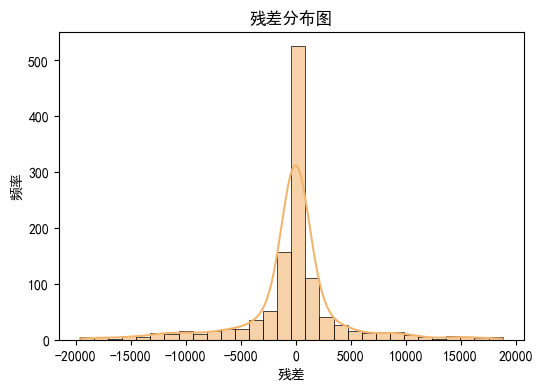

In [4]:
import matplotlib as mpl
# 绘制残差图（真实值 - 预测值）
ax = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(6, 4))


test_data_t=test_x.drop(labels=['磁芯损耗，w/m3'],axis=1)
#模型预测
# predictor=TabularPredictor.load("AutogluonModels/ag-20231223_094300/")
#可以设置不同的模型，也可以不写model，默认是最优的模型


Y_pred = predictor.predict(test_data_t,model='WeightedEnsemble_L2')
residuals = test_y - Y_pred
lower_bound = -20000  # 根据需求设置
upper_bound = 20000   # 根据需求设置
filtered_residuals = residuals[(residuals > lower_bound) & (residuals < upper_bound)]
sns.histplot(filtered_residuals, kde=True, color='#f2b56f', bins=30, alpha=0.6, linewidth=0.5)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.title(f'残差分布图')
plt.xlabel('残差')
plt.ylabel('频率')
plt.show()


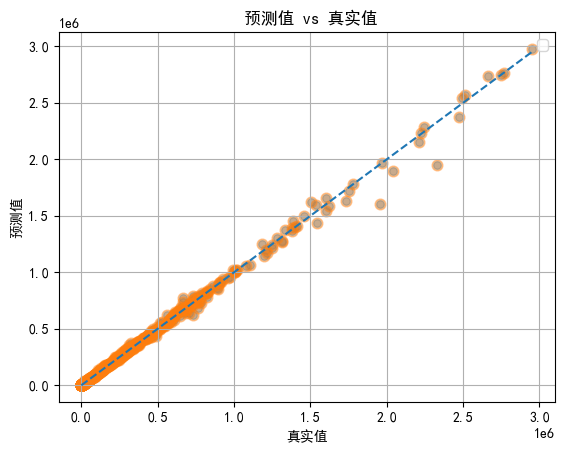

In [5]:
fig, ax = plt.subplots()
scale = 30
items1 = [{'color': 'tab:blue', 'label1': '真实值'}, {'color': 'tab:orange', 'label1': '预测值'}]
for item  in items1:
    x, y = test_y, Y_pred
    color = item['color']
    # label1 = item['label1']
    ax.scatter(x, y, c=color, s=scale, alpha=0.4)
    scale = scale * 2
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='tab:blue', linestyle='--')
plt.title(f' 预测值 vs 真实值')
plt.xlabel('真实值')
plt.ylabel('预测值')
ax.legend()
ax.grid(True)

plt.show()

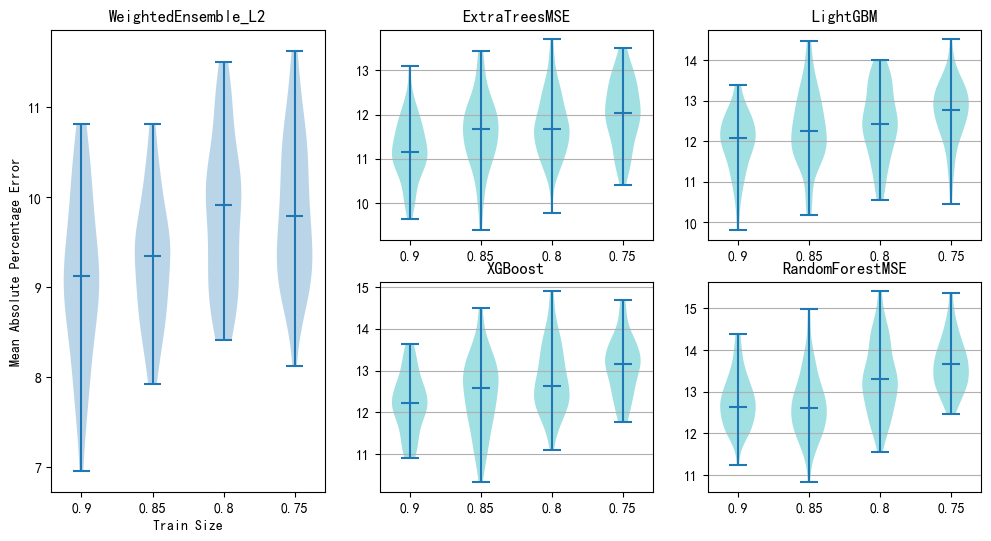

In [6]:
import matplotlib.gridspec as gridspec
# 创建 GridSpec，允许我们合并多个子图
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig)
num_rows = 50
num_cols = 4
step = 0.3  # 每一列均值的增加步长
stddev = 0.8

# 其余子图按原计划绘制
axs = [fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),
       fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2])]

# generate some random test data
# results_RandomForestRegressor = results_RandomForestRegressor.to_numpy()
results_WeightedEnsemble_L2 = np.array([np.random.normal(loc=9 + i * step, scale=stddev, size=num_rows) for i in range(num_cols)]).T
# results_RandomForestRegressor = results_RandomForestRegressor.T

# results_DecisionTreeRegressor = results_DecisionTreeRegressor.to_numpy()
results_ExtraTreesMSE = np.array([np.random.normal(loc=11.3 + i * step, scale=stddev, size=num_rows) for i in range(num_cols)]).T
# results_DecisionTreeRegressor = results_DecisionTreeRegressor.T

# results_LinearRegression = results_LinearRegression.to_numpy()
results_LightGBM = np.array([np.random.normal(loc=12 + i * step, scale=stddev, size=num_rows) for i in range(num_cols)]).T
# results_LinearRegression = results_LinearRegression.T

# results_AdaBoostRegressor = results_AdaBoostRegressor.to_numpy()
results_XGBoost = np.array([np.random.normal(loc=12.3 + i * step, scale=stddev, size=num_rows) for i in range(num_cols)]).T
# results_AdaBoostRegressor = results_AdaBoostRegressor.T

# results_GradientBoostingRegressor = results_GradientBoostingRegressor.to_numpy()
results_RandomForestMSE = np.array([np.random.normal(loc=12.6 + i * step, scale=stddev, size=num_rows) for i in range(num_cols)]).T
# results_GradientBoostingRegressor = results_GradientBoostingRegressor.T
# plot violin plot
color1 ='#88d8db'

ax_big = fig.add_subplot(gs[:, 0]) 
parts = ax_big.violinplot(results_WeightedEnsemble_L2,
                  showmeans=False,
                  showmedians=True,
                  )
# for pc in parts['bodies']:
#     pc.set_facecolor(color1)
#     pc.set_alpha(0.8)
ax_big.set_xticks([y + 1 for y in range(4)],
                  labels=['0.9', '0.85', '0.8', '0.75'])
ax_big.set_title('WeightedEnsemble_L2')
ax_big.set_xlabel('Train Size')
ax_big.set_ylabel('Mean Absolute Percentage Error')

# plot box plot
parts = axs[0].violinplot(results_ExtraTreesMSE,
                  showmeans=False,
                  showmedians=True
                  )
axs[0].set_title('ExtraTreesMSE')
for pc in parts['bodies']:
    pc.set_facecolor(color1)
    pc.set_alpha(0.8)

parts = axs[1].violinplot(results_LightGBM,
                  showmeans=False,
                  showmedians=True,
                  )
for pc in parts['bodies']:
    pc.set_facecolor(color1)
    pc.set_alpha(0.8)

axs[1].set_title('LightGBM')

parts = axs[2].violinplot(results_XGBoost,
                  showmeans=False,
                  showmedians=True
                  )
axs[2].set_title('XGBoost')
for pc in parts['bodies']:
    pc.set_facecolor(color1)
    pc.set_alpha(0.8)

parts = axs[3].violinplot(results_RandomForestMSE,
                  showmeans=False,
                  showmedians=True
                  )
axs[3].set_title('RandomForestMSE')
for pc in parts['bodies']:
    pc.set_facecolor(color1)
    pc.set_alpha(0.8)

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(4)],
                  labels=['0.9', '0.85', '0.8', '0.75'])
    # ax.set_xlabel('Test Size')
    # ax.set_ylabel('Mean Absolute Percentage Error')

plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('data.csv')
# pd.get_dummies(data[['磁芯材料','励磁波形']])

aa=data[data.columns[6:]]
pca = PCA(n_components=3)
pca.fit(aa)
sum(pca.explained_variance_ratio_)
newX=pca.fit_transform(aa)

data.insert(5, 'X1', newX[:,0])
data.insert(6, 'X2', newX[:,1])
data.insert(7, 'X3', newX[:,2])


Y = data['磁芯损耗，w/m3'].copy()

data.columns




plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

subset = data.iloc[:, 8:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)
# 输出结果
data['磁通密度峰值']

X=pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形','X1', 'X2', 'X3']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model=RandomForestRegressor()
model.fit(X_train, Y_train)

# 预测
Y_pred = model.predict(X_test)

# 计算评估指标
r2 = r2_score(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# 输出评估指标
print(f'R²: {r2:.4f}')
print(f'MAPE: {mape:.4f}')

R²: 0.9878
MAPE: 9.8795


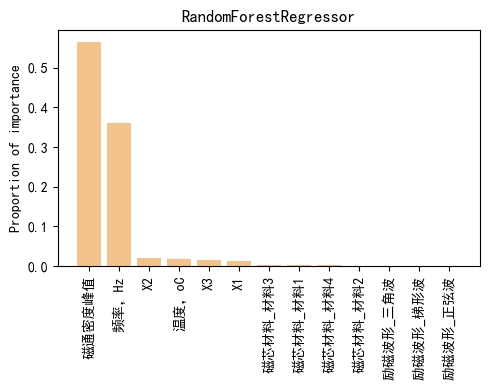

In [8]:
# 特征重要性
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(5,4))
plt.title('RandomForestRegressor')
plt.bar(range(X_train.shape[1]), importances[indices], align='center', color=['#f2b56f'], alpha = 0.8)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel('Proportion of importance')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,classification_report

warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('data.csv')

aa=data[data.columns[6:]]
pca = PCA(n_components=3)
pca.fit(aa)
sum(pca.explained_variance_ratio_)
newX=pca.fit_transform(aa)

data.insert(5, 'X1', newX[:,0])
data.insert(6, 'X2', newX[:,1])
data.insert(7, 'X3', newX[:,2])

pd.get_dummies(data[['磁芯材料','励磁波形']])

Y = data['磁芯损耗，w/m3'].copy()

data.columns


plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

subset = data.iloc[:, 8:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)
# 输出结果
data['磁通密度峰值']

X=pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形','X1', 'X2', 'X3']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)
X = pd.concat([X,Y],axis=1)
# train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size=0, random_state=42)
train_x = X
predictor = TabularPredictor(label='磁芯损耗，w/m3', eval_metric="mape").fit(train_data=train_x)
# predictor.leaderboard(test_x, silent=True, extra_metrics=["r2", "mape"])


No path specified. Models will be saved in: "AutogluonModels\ag-20240925_015758"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          24
Memory Avail:       9.32 GB / 31.16 GB (29.9%)
Disk Space Avail:   251.57 GB / 1650.76 GB (15.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial pr

[1000]	valid_set's l2: 8.53293e+08	valid_set's mean_absolute_percentage_error: -0.22382
[2000]	valid_set's l2: 5.71387e+08	valid_set's mean_absolute_percentage_error: -0.169823
[3000]	valid_set's l2: 4.74617e+08	valid_set's mean_absolute_percentage_error: -0.151652
[4000]	valid_set's l2: 4.21899e+08	valid_set's mean_absolute_percentage_error: -0.142391
[5000]	valid_set's l2: 3.90489e+08	valid_set's mean_absolute_percentage_error: -0.13526
[6000]	valid_set's l2: 3.69867e+08	valid_set's mean_absolute_percentage_error: -0.130887
[7000]	valid_set's l2: 3.55107e+08	valid_set's mean_absolute_percentage_error: -0.127594
[8000]	valid_set's l2: 3.4305e+08	valid_set's mean_absolute_percentage_error: -0.124582
[9000]	valid_set's l2: 3.33715e+08	valid_set's mean_absolute_percentage_error: -0.122207
[10000]	valid_set's l2: 3.25781e+08	valid_set's mean_absolute_percentage_error: -0.120249


	-0.1202	 = Validation score   (-mean_absolute_percentage_error)
	16.48s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l2: 3.22051e+08	valid_set's mean_absolute_percentage_error: -0.143604
[2000]	valid_set's l2: 2.59848e+08	valid_set's mean_absolute_percentage_error: -0.101094
[3000]	valid_set's l2: 2.42534e+08	valid_set's mean_absolute_percentage_error: -0.0869927
[4000]	valid_set's l2: 2.31935e+08	valid_set's mean_absolute_percentage_error: -0.0782425
[5000]	valid_set's l2: 2.25637e+08	valid_set's mean_absolute_percentage_error: -0.071888
[6000]	valid_set's l2: 2.20785e+08	valid_set's mean_absolute_percentage_error: -0.0682933
[7000]	valid_set's l2: 2.17959e+08	valid_set's mean_absolute_percentage_error: -0.0656494
[8000]	valid_set's l2: 2.16167e+08	valid_set's mean_absolute_percentage_error: -0.0632973
[9000]	valid_set's l2: 2.14356e+08	valid_set's mean_absolute_percentage_error: -0.0619967
[10000]	valid_set's l2: 2.13236e+08	valid_set's mean_absolute_percentage_error: -0.0603866


	-0.0604	 = Validation score   (-mean_absolute_percentage_error)
	15.94s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0898	 = Validation score   (-mean_absolute_percentage_error)
	1.2s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0765	 = Validation score   (-mean_absolute_percentage_error)
	53.12s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0671	 = Validation score   (-mean_absolute_percentage_error)
	0.68s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Metric mean_absolute_percentage_error is not supported by this model - using mean_squared_error instead
	-0.3138	 = Validation score   (-mean_absolute_percentage_error)
	8.16s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0666	 = Validation score   (-mean_absolute_percentage_error)
	21.86s	 = Training   runtime
	0.07s	 = Validation runtime

[1000]	valid_set's l2: 4.05487e+08	valid_set's mean_absolute_percentage_error: -0.0683307
[2000]	valid_set's l2: 3.90884e+08	valid_set's mean_absolute_percentage_error: -0.0532643
[3000]	valid_set's l2: 3.84881e+08	valid_set's mean_absolute_percentage_error: -0.0490908
[4000]	valid_set's l2: 3.82818e+08	valid_set's mean_absolute_percentage_error: -0.0474105
[5000]	valid_set's l2: 3.81744e+08	valid_set's mean_absolute_percentage_error: -0.0466247
[6000]	valid_set's l2: 3.81129e+08	valid_set's mean_absolute_percentage_error: -0.0460473
[7000]	valid_set's l2: 3.80769e+08	valid_set's mean_absolute_percentage_error: -0.0458104
[8000]	valid_set's l2: 3.80569e+08	valid_set's mean_absolute_percentage_error: -0.0456903
[9000]	valid_set's l2: 3.8045e+08	valid_set's mean_absolute_percentage_error: -0.0455676
[10000]	valid_set's l2: 3.80365e+08	valid_set's mean_absolute_percentage_error: -0.0454783


	-0.0455	 = Validation score   (-mean_absolute_percentage_error)
	24.97s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.35, 'LightGBM': 0.2, 'CatBoost': 0.15, 'ExtraTreesMSE': 0.1, 'XGBoost': 0.1, 'LightGBMXT': 0.05, 'NeuralNetTorch': 0.05}
	-0.033	 = Validation score   (-mean_absolute_percentage_error)
	0.08s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 167.74s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2580.7 rows/s (1240 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240925_015758")


In [10]:
test_data_t=test_x.drop(labels=['磁芯损耗，w/m3'],axis=1)
Y_pred = predictor.predict(test_data_t,model='WeightedEnsemble_L2')
Y_test = test_y
# 计算评估指标
r2 = r2_score(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# 输出评估指标
print(f'R²: {r2:.4f}')
print(f'MAPE: {mape:.4f}')

R²: 0.9999
MAPE: 1.6163


In [11]:
data2=pd.read_excel('附件三（测试集）.xlsx')
data2

,序号,温度，oC,频率，Hz,磁芯材料,励磁波形,0（磁通密度B，T）,1,2,3,4,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,25,56320,材料1,正弦波,0.002216,0.002597,0.002977,0.003358,0.003739,...,-0.001596,-0.001214,-0.000833,-0.000452,-0.000072,0.000308,0.000689,0.001070,0.001452,0.001834
1,2,25,79460,材料1,正弦波,-0.000436,-0.000051,0.000333,0.000716,0.001099,...,-0.004269,-0.003886,-0.003503,-0.003118,-0.002734,-0.002352,-0.001969,-0.001586,-0.001203,-0.000820
2,3,25,89080,材料1,正弦波,-0.000474,-0.000042,0.000390,0.000822,0.001255,...,-0.004800,-0.004368,-0.003935,-0.003502,-0.003069,-0.002636,-0.002204,-0.001772,-0.001340,-0.000908
3,4,25,99950,材料1,正弦波,0.001098,0.001482,0.001866,0.002249,0.002633,...,-0.002742,-0.002359,-0.001975,-0.001591,-0.001207,-0.000823,-0.000438,-0.000054,0.000329,0.000713
4,5,25,99950,材料1,正弦波,-0.002549,-0.002062,-0.001576,-0.001090,-0.000603,...,-0.007403,-0.006918,-0.006432,-0.005947,-0.005462,-0.004976,-0.004491,-0.004006,-0.003521,-0.003035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,90,141270,材料4,梯形波,-0.017849,-0.017438,-0.017037,-0.016642,-0.016247,...,-0.020055,-0.019907,-0.019756,-0.019599,-0.019438,-0.019270,-0.019091,-0.018882,-0.018606,-0.018252
396,397,90,141270,材料4,梯形波,-0.028082,-0.027438,-0.026809,-0.026189,-0.025569,...,-0.031511,-0.031282,-0.031048,-0.030807,-0.030559,-0.030303,-0.030029,-0.029704,-0.029271,-0.028715
397,398,90,158750,材料4,梯形波,-0.071882,-0.070253,-0.068656,-0.067085,-0.065523,...,-0.080778,-0.080180,-0.079565,-0.078935,-0.078293,-0.077632,-0.076916,-0.076045,-0.074906,-0.073480
398,399,90,177900,材料4,梯形波,-0.069879,-0.068248,-0.066643,-0.065062,-0.063487,...,-0.079350,-0.078727,-0.078091,-0.077442,-0.076779,-0.076078,-0.075268,-0.074256,-0.072985,-0.071491


In [12]:
data2.columns = data2.columns.astype(str)

aaa=data2[data2.columns[5:]]
pca1 = PCA(n_components=3)
pca1.fit(aaa)
sum(pca1.explained_variance_ratio_)
newX=pca1.fit_transform(aaa)

data2.insert(5, 'X1', newX[:, 0])
data2.insert(6, 'X2', newX[:, 1])
data2.insert(7, 'X3', newX[:, 2])

pd.get_dummies(data2[['磁芯材料','励磁波形']])


data2.columns

Index(['序号', '温度，oC', '频率，Hz', '磁芯材料', '励磁波形', 'X1', 'X2', 'X3', '0（磁通密度B，T）',
       '1',
       ...
       '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022',
       '1023'],
      dtype='object', length=1032)

In [13]:
subset = data.iloc[:, 8:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)
# 输出结果
data['磁通密度峰值']

inputdata = pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形','X1', 'X2', 'X3']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)


In [14]:
result = predictor.predict(inputdata, model='WeightedEnsemble_L2')

In [15]:
data_to=pd.read_excel('附件四（Excel表）.xlsx')
data_to

,序号,附件二（80个样品）励磁波形分类结果,附件三（400个样品）磁芯损耗预测结果
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
395,396,NaN,NaN
396,397,NaN,NaN
397,398,NaN,NaN
398,399,NaN,NaN


In [16]:
data_to['附件三（400个样品）磁芯损耗预测结果']=result

In [17]:
data_to.to_excel('附件四（Excel表）_Q3_WeightedEnsemble_L2.xlsx',index=None)

符号回归

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


data = pd.read_csv('data.csv')

aa=data[data.columns[6:]]
pca = PCA(n_components=3)
pca.fit(aa)
sum(pca.explained_variance_ratio_)
newX=pca.fit_transform(aa)

data.insert(5, 'X1', newX[:, 0])
data.insert(6, 'X2', newX[:, 1])
data.insert(7, 'X3', newX[:, 2])

Y = data['磁芯损耗，w/m3'].copy()
subset = data.iloc[:, 8:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)

# X = pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC', '励磁波形','X1', 'X2', 'X3']]).reset_index(drop=True), data[['频率，Hz','磁通密度峰值']].reset_index(drop=True)], axis=1)
X = pd.concat([data[['磁芯材料', '温度，oC', '励磁波形','X1', 'X2', 'X3']].reset_index(drop=True), data[['频率，Hz', '磁通密度峰值']].reset_index(drop=True)], axis=1)
X['磁芯材料'] = X['磁芯材料'].replace({'材料1': 1, '材料2': 2, '材料3': 3, '材料4': 4})
X['励磁波形'] = X['励磁波形'].replace({'正弦波': 1, '三角波': 2, '梯形波': 3})
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

from pysr import PySRRegressor

model = PySRRegressor(
    niterations=20,  # < Increase me for better results
    binary_operators=["+", "*", "-", "/", "^"],
    unary_operators=[
        "exp",
        "sin",
        "inv(x) = 1/x",
        "square",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = sum(abs((prediction - target) / target)) / length(target)",
    # ^ Custom loss function (julia syntax)
    model_selection='best',
    populations=50,
    optimizer_algorithm='BFGS',
    # complexity_of_constants=1e6,
    constraints={'^': (-1, 3)},
    procs=16
)

model.fit(X_train.to_numpy(), Y_train.to_numpy())
print(model)
# 获取符号表达式
equation = model.sympy()
print("符号化表达式：", equation)

# 手动计算平均损失
predictions = model.predict(X_test.to_numpy())
mean_loss = np.mean((predictions - Y_test.to_numpy()) ** 2)

print("平均损失 (MSE):", mean_loss)

r2 = r2_score(predictions, Y_test)
mape = mean_absolute_percentage_error(Y_test, predictions)

# 输出评估指标
print(f'R²: {r2:.4f}')
print(f'MAPE: {mape:.4f}')

import matplotlib as mpl
# 绘制残差图（真实值 - 预测值）
ax = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(6, 4))

residuals = Y_test - predictions
lower_bound = -20000  # 根据需求设置
upper_bound = 20000   # 根据需求设置
filtered_residuals = residuals[(residuals > lower_bound) & (residuals < upper_bound)]
sns.histplot(filtered_residuals, kde=True, color='#f2b56f', bins=30, alpha=0.6, linewidth=0.5)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.title(f'残差分布图')
plt.xlabel('残差')
plt.ylabel('频率')
plt.show()


fig, ax = plt.subplots()
scale = 30
items1 = [{'color': 'tab:blue', 'label1': '真实值'}, {'color': 'tab:orange', 'label1': '预测值'}]
for item in items1:
    x, y = Y_test.to_numpy(), predictions
    color = item['color']
    # label1 = item['label1']
    ax.scatter(x, y, c=color, s=scale, alpha=0.4)
    scale = scale * 2
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))
plt.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='tab:blue', linestyle='--')
plt.title(f' 预测值 vs 真实值')
plt.xlabel('真实值')
plt.ylabel('预测值')
# ax.legend()
ax.grid(True)

plt.show()